In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
# load the provisional county data
pro_file = 'https://raw.githubusercontent.com/josh1den/DATA-602/main/FINAL_PROJECT/Provisional_COVID-19_Death_Counts_in_the_United_States_by_County.csv'
pro_df = pd.read_csv(pro_file)
pro_df.head()

,Date as of,Start Date,End Date,State,County name,FIPS County Code,Urban Rural Code,Deaths involving COVID-19,Deaths from All Causes,Footnote
0,10/19/2022,01/01/2020,10/15/2022,AK,Aleutians East Borough,2013,Noncore,NaN,22.0,One or more data cells have counts between 1-9...
1,10/19/2022,01/01/2020,10/15/2022,AK,Anchorage Municipality,2020,Medium metro,734.0,7081.0,NaN
2,10/19/2022,01/01/2020,10/15/2022,AK,Bethel Census Area,2050,Noncore,39.0,317.0,NaN
3,10/19/2022,01/01/2020,10/15/2022,AK,Denali Borough,2068,Noncore,NaN,24.0,One or more data cells have counts between 1-9...
4,10/19/2022,01/01/2020,10/15/2022,AK,Dillingham Census Area,2070,Noncore,NaN,96.0,One or more data cells have counts between 1-9...


In [64]:
# subset and aggregate the data by state, county, and total deaths
death_cols = ['State','Deaths involving COVID-19','County name']
deaths = pro_df[death_cols]
deaths.rename({'State':'st','Deaths involving COVID-19':'total_deaths','County name':'county'}, axis=1, inplace=True)
deaths_by_sc = deaths.groupby(['st','county'])['total_deaths'].sum().sort_values(ascending=False).reset_index()
deaths_by_sc.head()

/var/folders/82/s2jpfjnx23x79yzgnlx3kx_h0000gp/T/ipykernel_5784/2064728777.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths.rename({'State':'st','Deaths involving COVID-19':'total_deaths','County name':'county'}, axis=1, inplace=True)


,st,county,total_deaths
0,CA,Los Angeles County,31094.0
1,AZ,Maricopa County,17970.0
2,IL,Cook County,15478.0
3,TX,Harris County,13207.0
4,NY,Kings County,10733.0


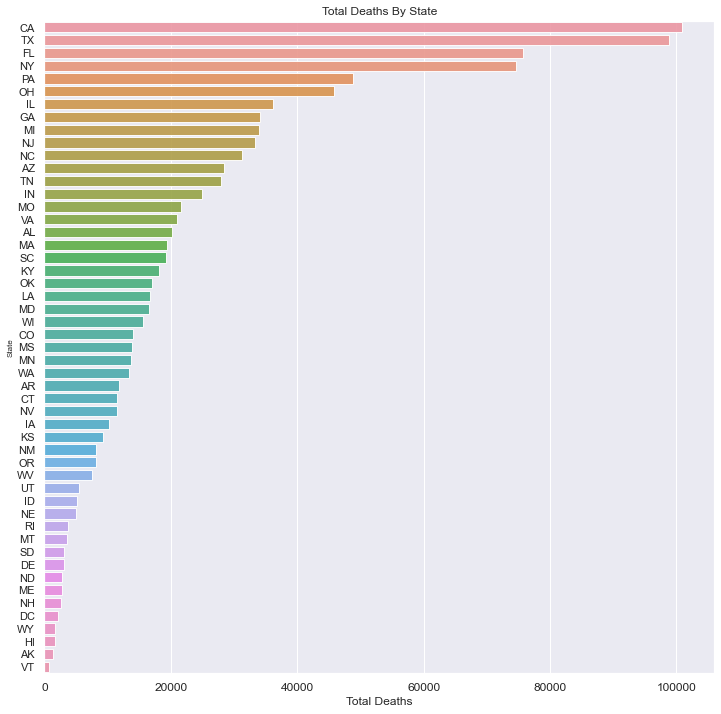

In [24]:
# plot total deaths by state
%matplotlib inline

# aggregate by state
by_state = deaths_by_sc.groupby('st')['total_deaths'].sum().sort_values(ascending=False)

# plot the data
plt.figure(figsize=(12,12))
sns.set(style='darkgrid')
sns.barplot(x=by_state.values, y=by_state.index, alpha=0.9)
plt.title('Total Deaths By State')
plt.xlabel('Total Deaths', fontsize=12)
plt.ylabel('State', fontsize=8)
plt.xticks(fontsize=12)
plt.show();

In [65]:
# strip the word "county" from the county column
deaths_by_sc['county'] = deaths_by_sc['county'].str.replace(' County', '')
deaths_by_sc.head()

,st,county,total_deaths
0,CA,Los Angeles,31094.0
1,AZ,Maricopa,17970.0
2,IL,Cook,15478.0
3,TX,Harris,13207.0
4,NY,Kings,10733.0


In [66]:
# read in iris: data.csv
irs_file = '/Users/joshiden/Documents/Classes/CUNY SPS/Fall 2022/DATA 602/DATA-602/FINAL_PROJECT/data.csv'
irs_df = pd.read_csv(irs_file)

In [28]:
irs_df.head()

,Unnamed: 0,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,0,1,AL,0,1,778210.0,491030.0,84770.0,189600.0,712890.0,...,0.0,0.0,62720.0,51936.0,671860.0,1700965.0,669570.0,1694792.0,1980.0,3512.0
1,1,1,AL,0,2,525940.0,247140.0,123910.0,139860.0,481760.0,...,0.0,0.0,85860.0,122569.0,438020.0,1274802.0,435210.0,1266557.0,3670.0,7410.0
2,2,1,AL,0,3,285700.0,105140.0,128140.0,44560.0,260570.0,...,0.0,0.0,73980.0,154932.0,212040.0,575315.0,208470.0,564202.0,5020.0,13653.0
3,3,1,AL,0,4,179070.0,38820.0,123110.0,13740.0,164300.0,...,0.0,0.0,51330.0,139065.0,126850.0,401581.0,123310.0,388749.0,3040.0,10377.0
4,4,1,AL,0,5,257010.0,28180.0,216740.0,7150.0,236850.0,...,90.0,141.0,104290.0,460071.0,152790.0,598248.0,144640.0,539385.0,9180.0,56257.0


In [29]:
# subset desired columns
cols = ['STATE','zipcode','N1','N2','A00100','A02650']
irs_sub = irs_df[cols]
irs_sub.head()

,STATE,zipcode,N1,N2,A00100,A02650
0,AL,0,778210.0,1161150.0,10158838.0,10311099.0
1,AL,0,525940.0,992420.0,18974967.0,19145621.0
2,AL,0,285700.0,595680.0,17535801.0,17690402.0
3,AL,0,179070.0,432180.0,15546951.0,15670456.0
4,AL,0,257010.0,692450.0,34974856.0,35286228.0


In [30]:
# rename columns
cols = {'STATE':'state', 'zipcode':'zip', 'N1':'num_returns', 'N2':'num_indiv', 'A00100':'agi', 'A02650':'total_income'}
irs_sub = irs_sub.rename(columns=cols)
irs_sub.head()

,state,zip,num_returns,num_indiv,agi,total_income
0,AL,0,778210.0,1161150.0,10158838.0,10311099.0
1,AL,0,525940.0,992420.0,18974967.0,19145621.0
2,AL,0,285700.0,595680.0,17535801.0,17690402.0
3,AL,0,179070.0,432180.0,15546951.0,15670456.0
4,AL,0,257010.0,692450.0,34974856.0,35286228.0


In [68]:
filepath = "/Users/joshiden/Documents/Classes/CUNY SPS/Fall 2022/DATA 602/DATA-602/FINAL_PROJECT/irs_data.csv"
irs_sub.to_csv(filepath, index=False)

In [67]:
# read in tidied irs data from github
irs_df = pd.read_csv('https://raw.githubusercontent.com/josh1den/DATA-602/main/FINAL_PROJECT/SOURCE/irs_data.csv')
irs_df.head()

,state,zip,num_returns,num_indiv,agi,total_income
0,AL,0,778210.0,1161150.0,10158838.0,10311099.0
1,AL,0,525940.0,992420.0,18974967.0,19145621.0
2,AL,0,285700.0,595680.0,17535801.0,17690402.0
3,AL,0,179070.0,432180.0,15546951.0,15670456.0
4,AL,0,257010.0,692450.0,34974856.0,35286228.0


We can see that the IRS data is only available by State and Zipcode, and some observations are missing a zip code.

In [57]:
# how many zip codes are missing? 
irs_df.zip.isna().sum()

0

In [61]:
irs_df[irs_df['zip'] == 0].zip.count()

306

In [62]:
# are the missing zip codes limited to specific states? 
irs_df[irs_df['zip'] == 0].state.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [82]:
# read in the CDC community levels data
com_file = 'https://raw.githubusercontent.com/josh1den/DATA-602/main/FINAL_PROJECT/United_States_COVID-19_Community_Levels_by_County.csv'
com_df = pd.read_csv(com_file)
com_df.head()

,county,county_fips,state,county_population,health_service_area_number,health_service_area,health_service_area_population,covid_inpatient_bed_utilization,covid_hospital_admissions_per_100k,covid_cases_per_100k,covid-19_community_level,date_updated
0,Lincoln County,55069,Wisconsin,27593.0,282,"Marathon (Wausau), WI - Wood, WI",291401.0,4.7,13.4,177.58,Medium,2022-08-18
1,Manitowoc County,55071,Wisconsin,78981.0,355,"Sheboygan (Sheboygan), WI - Manitowoc, WI",244410.0,3.4,9.8,169.66,Low,2022-08-18
2,Marathon County,55073,Wisconsin,135692.0,282,"Marathon (Wausau), WI - Wood, WI",291401.0,4.7,13.4,209.30,High,2022-08-18
3,Monroe County,55081,Wisconsin,46253.0,290,"La Crosse (La Crosse), WI - Monroe, WI",257027.0,3.9,15.6,216.20,High,2022-08-18
4,Portage County,55097,Wisconsin,70772.0,400,"Portage, WI",70772.0,5.9,7.1,217.60,Medium,2022-08-18


In [84]:
# subset the desired columns
cols = ['county','state','covid_hospital_admissions_per_100k','covid_cases_per_100k']
com_df = com_df[cols]
com_df.head()

,county,state,covid_hospital_admissions_per_100k,covid_cases_per_100k
0,Lincoln County,Wisconsin,13.4,177.58
1,Manitowoc County,Wisconsin,9.8,169.66
2,Marathon County,Wisconsin,13.4,209.30
3,Monroe County,Wisconsin,15.6,216.20
4,Portage County,Wisconsin,7.1,217.60


In [86]:
# strip the word "County" from the county column
com_df['county'] = com_df['county'].str.replace(' County', '')
com_df.head()

,county,state,covid_hospital_admissions_per_100k,covid_cases_per_100k
0,Lincoln,Wisconsin,13.4,177.58
1,Manitowoc,Wisconsin,9.8,169.66
2,Marathon,Wisconsin,13.4,209.30
3,Monroe,Wisconsin,15.6,216.20
4,Portage,Wisconsin,7.1,217.60


In [87]:
# convert state column to abbreviations - thank you (https://gist.github.com/rogerallen/1583593)
abbreviations = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'District of Columbia': 'DC',
    'American Samoa': 'AS',
    'Guam': 'GU',
    'Northern Mariana Islands': 'MP',
    'Puerto Rico': 'PR',
    'United States Minor Outlying Islands': 'UM',
    'U.S. Virgin Islands': 'VI',
}

In [88]:
com_df['state'] = com_df.state.map(abbreviations)
com_df.head()

,county,state,covid_hospital_admissions_per_100k,covid_cases_per_100k
0,Lincoln,WI,13.4,177.58
1,Manitowoc,WI,9.8,169.66
2,Marathon,WI,13.4,209.30
3,Monroe,WI,15.6,216.20
4,Portage,WI,7.1,217.60


In [91]:
# double check the states all converted
com_df.state.unique()

array(['WI', 'WY', 'PR', nan, 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT',
       'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME',
       'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
       'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'AS', 'DE', 'DC', 'GU'],
      dtype=object)

In [93]:
# how many nans? 
com_df.isna().sum()

county                                 0
state                                 68
covid_hospital_admissions_per_100k    58
covid_cases_per_100k                   0
dtype: int64

In [94]:
# view the counties with nans
com_df[com_df['state'].isna()].county.unique()

array(['United States Virgin Islands',
       'Commonwealth of the Northern Mariana Islands'], dtype=object)

In [95]:
# drop these territories
com_df.dropna(inplace=True)
com_df.state.isna().sum()

0

In [96]:
# write to file for storage
filepath = "/Users/joshiden/Documents/Classes/CUNY SPS/Fall 2022/DATA 602/DATA-602/FINAL_PROJECT/com_data_cleaned.csv"
com_df.to_csv(filepath, index=False)